In [1]:
import torch
from torch import nn 
from torch import autograd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pathlib
import fastai
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
PATH='../../../cat-dogs-data-np/'
sz=224

In [3]:
def show_image(im):
    fig,ax=plt.subplots();
    ax.axis('off')
    ax.imshow(im)
    return ax

In [4]:
files=os.listdir(f'{PATH}/train/cat')

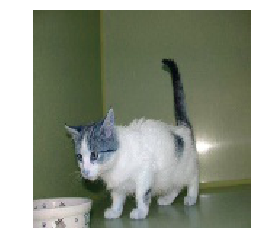

In [5]:
img=cv2.imread(f'{PATH}/train/cat/{files[0]}')
show_image(img)

In [6]:
arch=resnet18
data=ImageClassifierData.from_paths(PATH,tfms=tfms_from_model(arch,sz))
learn=ConvLearner.pretrained(arch,data,precompute=True)
learn.fit(0.01,1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.198145   0.043015   0.9818    



[array([0.04302]), 0.9817997977755308]

In [9]:
learn.fit(1e-2,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      0.090002   0.042069   0.984833  
    1      0.073405   0.036361   0.987867                   
    2      0.071355   0.036166   0.986855                   
    3      0.071302   0.032211   0.988878                   
    4      0.05686    0.033126   0.985844                   
    5      0.062649   0.033606   0.986855                   
    6      0.054652   0.02935    0.9909                     



[array([0.02935]), 0.9908998988877654]

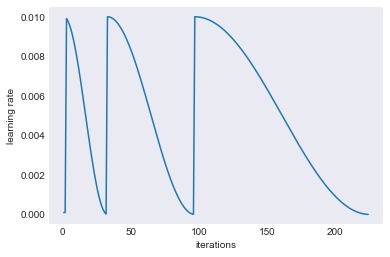

In [10]:
learn.sched.plot_lr()

In [8]:
import seaborn as sns
sns.set_style(style='dark')

In [7]:
data.classes

['cat', 'dog']

In [11]:
log_preds=learn.predict()
log_preds.shape

(989, 2)

In [12]:
probs=np.exp(log_preds)

In [13]:
def read_images(indexs):
    imgs=[]
    for ic in indexs:
        path=PATH+data.val_ds.fnames[ic]
        img=cv2.imread(path)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        imgs.append(img)
    return imgs

def show_imgs(indexs):
    imgs=read_images(indexs)
    if len(indexs)==0:return
    n_col,n_rows=4,int((len(indexs)-1)/4)+1
    fig,ax=plt.subplots(n_rows,n_col,figsize=(10,6))
    for r in range(n_rows):
        for c in range(n_col):
            if (n_col*r+c==len(imgs)):break
            if (n_rows!=1):
                ax[r,c].set_title(probs[indexs[n_col*r+c]][0])
                ax[r,c].axis('off')
                ax[r,c].imshow(imgs[n_col*r+c])
            else:
                if (n_col*r+c==len(imgs)):break
                ax[c].set_title(probs[indexs[n_col*r+c]][0])
                ax[c].axis('off')
                ax[c].imshow(imgs[n_col*r+c])


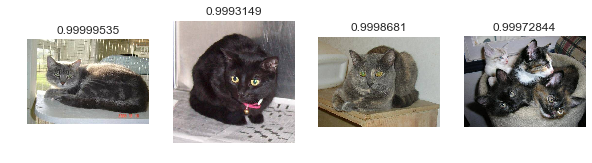

In [15]:
show_imgs([99,100,120,110])

In [149]:
learn.lr_find()

 91%|█████████ | 29/32 [00:01<00:00, 18.77it/s, loss=0.324] 


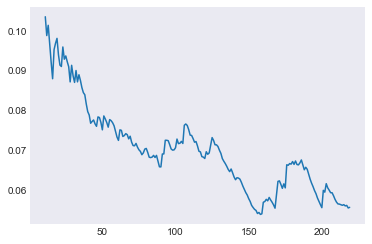

In [17]:
learn.sched.plot_loss()

In [152]:
learn.fit(1e-2,1)

epoch      trn_loss   val_loss   accuracy                   
    0      0.091288   0.053094   0.982811  



[array([0.05309]), 0.9828109201213346]

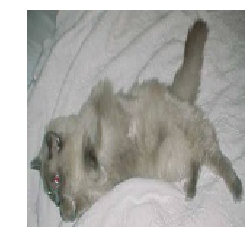

In [18]:
show_image(data.trn_ds.get_x(500))

In [62]:
tfms= tfms_from_model(arch,sz,aug_tfms=transforms_side_on,max_zoom=1.1)
data=ImageClassifierData.from_paths(PATH,bs=2,tfms=tfms)

In [32]:
x,y=next(iter(data.aug_dl))

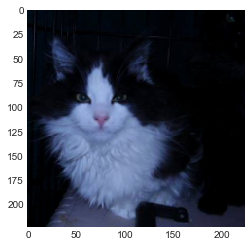

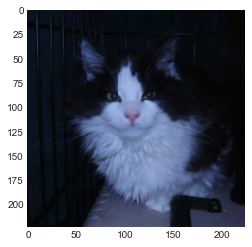

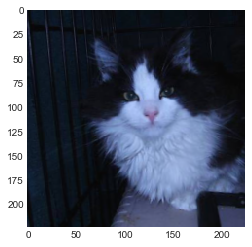

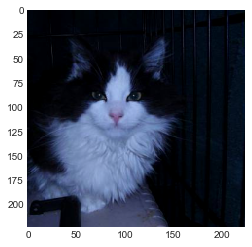

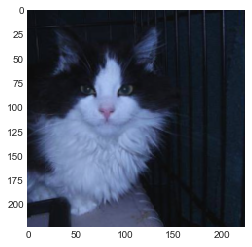

In [64]:
for ix in range(5):
    x,y=next(iter(data.aug_dl))
    s=data.trn_ds.denorm(x[0])[0]
    plt.figure(ix)
    plt.imshow(s)

In [65]:
learn.precompute=False

In [66]:
learn.fit(1e-4,1)

epoch      trn_loss   val_loss   accuracy                   
    0      0.044855   0.029276   0.989889  



[array([0.02928]), 0.9898887765419616]